# Feature Extraction
This notebook dives into the dimensionally confusing world of feature extraction and importance. We will discuss the following topics:

1) What are features?
2) Why care about features?
3) Example feature extraction approaches
   - 1D Feature Extraction
   - 2D Feature Extraction
4) References

We will discuss how to evaluate features and choose the best features in other notebooks.

Create by: Ryan A. McCarthy

In [3]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import librosa 
import librosa.display
import IPython.display as ipd

from glob import glob
import opendatasets as od 

## What Are Features?
Features are measurable propeties that are input to a system. These inputs are related to a particular data-sample that a machine learning model can interpret to provide a prediction. Features are typically independent from each other and provide specific details about the sample. Examples of features in audio could include (but are not limited to):

- Pitch
- Intensity
- Energy
- Envelope
- Timbre
- Zero-crossing rate
- Rhythm
- Melody
- Chords

In addition to the features listed above, there are other methods to extract pertinent information that are useful. For example, one could use fast fourier transforms or Mel-frequency cepstral coefficients (highlighted below) to extract features. 

In a more generalized sense, many things could be a feautre for input. These are similar to the descriptions that help lead us to a word/solution/or anything else that aids in predictions. As an example, let's looks at Spotify top songs audio features that were extracted.

In [6]:
od.download('https://www.kaggle.com/datasets/julianoorlandi/spotify-top-songs-and-audio-features')
df = pd.read_csv("spotify-top-songs-and-audio-features/spotify_top_songs_audio_features.csv")

In [7]:
df

id                         artist_names  \
0     000xQL6tZNLJzIrtIgxqSl                  ZAYN, PARTYNEXTDOOR   
1     003eoIwxETJujVWmNFMoZy                         Alessia Cara   
2     003vvx7Niy0yvhvHt4a68B                          The Killers   
3     00B7TZ0Xawar6NZ00JFomN           Cardi B, Chance the Rapper   
4     00Blm7zeNqgYLPtW6zg8cj              Post Malone, The Weeknd   
...                      ...                                  ...   
6508  7zgqtptZvhf8GEmdsM2vp2                         Taylor Swift   
6509  7zjEyeBsaw9gV0jofJLfOM  Young Thug, A$AP Rocky, Post Malone   
6510  7zl7kehxesNEo2pYkKXTSe          Eminem, Jack Harlow, Cordae   
6511  7zvfDihYiJ8RQ1nRcpKBF5          Kendrick Lamar, Tanna Leone   
6512  7zxRMhXxJMQCeDDg0rKAVo                      NAV, The Weeknd   

                                       track_name  \
0            Still Got Time (feat. PARTYNEXTDOOR)   
1                                   Growing Pains   
2                                  Mr. Brightside   
3             Best Life (feat. Chance The Rapper)   
4                 One Right Now (with The Weeknd)   
...                                           ...   
6508                             ...Ready For It?   
6509  Livin It Up (with Post Malone & A$AP Rocky)   
6510  Killer (feat. Jack Harlow & Cordae) - Remix   
6511                                   Mr. Morale   
6512                                     Some Way   

                                                 source    key   mode  \
0                                     RCA Records Label      G  Major   
1                                    Def Jam Recordings  C#/Db  Minor   
2                                        Island Records  C#/Db  Major   
3                                          Atlantic/KSR      A  Major   
4                                      Republic Records  C#/Db  Major   
...                                                 ...    ...    ...   
6508                           Big Machine Records, LLC      D  Major   
6509                              300 Entertainment/Atl      G  Major   
6510                 Shady/Aftermath/Interscope Records      B  Minor   
6511  pgLang/Top Dawg Entertainment/Aftermath/Inters...      A  Major   
6512                                         XO Records      C  Major   

     time_signature  danceability  energy  speechiness  acousticness  \
0           4 beats         0.748   0.627       0.0639       0.13100   
1           4 beats         0.353   0.755       0.7330       0.08220   
2           4 beats         0.352   0.911       0.0747       0.00121   
3           4 beats         0.620   0.625       0.5530       0.28700   
4           4 beats         0.687   0.781       0.0530       0.03610   
...             ...           ...     ...          ...           ...   
6508        4 beats         0.615   0.779       0.1350       0.06650   
6509        4 beats         0.767   0.313       0.0798       0.83800   
6510        4 beats         0.924   0.730       0.2740       0.05250   
6511        3 beats         0.727   0.530       0.3120       0.28300   
6512        4 beats         0.744   0.715       0.3510       0.10100   

      instrumentalness  liveness  valence  loudness    tempo  duration_ms  \
0             0.000000    0.0852    0.524    -6.029  120.963       188491   
1             0.000000    0.3900    0.437    -6.276  191.153       193680   
2             0.000000    0.0995    0.236    -5.230  148.033       222973   
3             0.000000    0.3140    0.665    -7.438  167.911       284856   
4             0.000000    0.0755    0.688    -4.806   97.014       193507   
...                ...       ...      ...       ...      ...          ...   
6508          0.000000    0.1550    0.453    -6.454  160.000       208198   
6509          0.000000    0.1050    0.765   -12.059   82.582       210907   
6510          0.000000    0.1130    0.848    -6.125   99.010       236666   
6511          0.000028    0.3920    0.258    -8.

We can see that these features can contain numerical values, categorical values, boolean, etc. It's important to note that not all features are helpful to predict an output. Some features may create confusion for a model or my be ambiguous. Let's take the above example and plot the features against each other. This will give us a visual inspection of how variables co-vary with each other.

<Figure size 800x640 with 0 Axes>

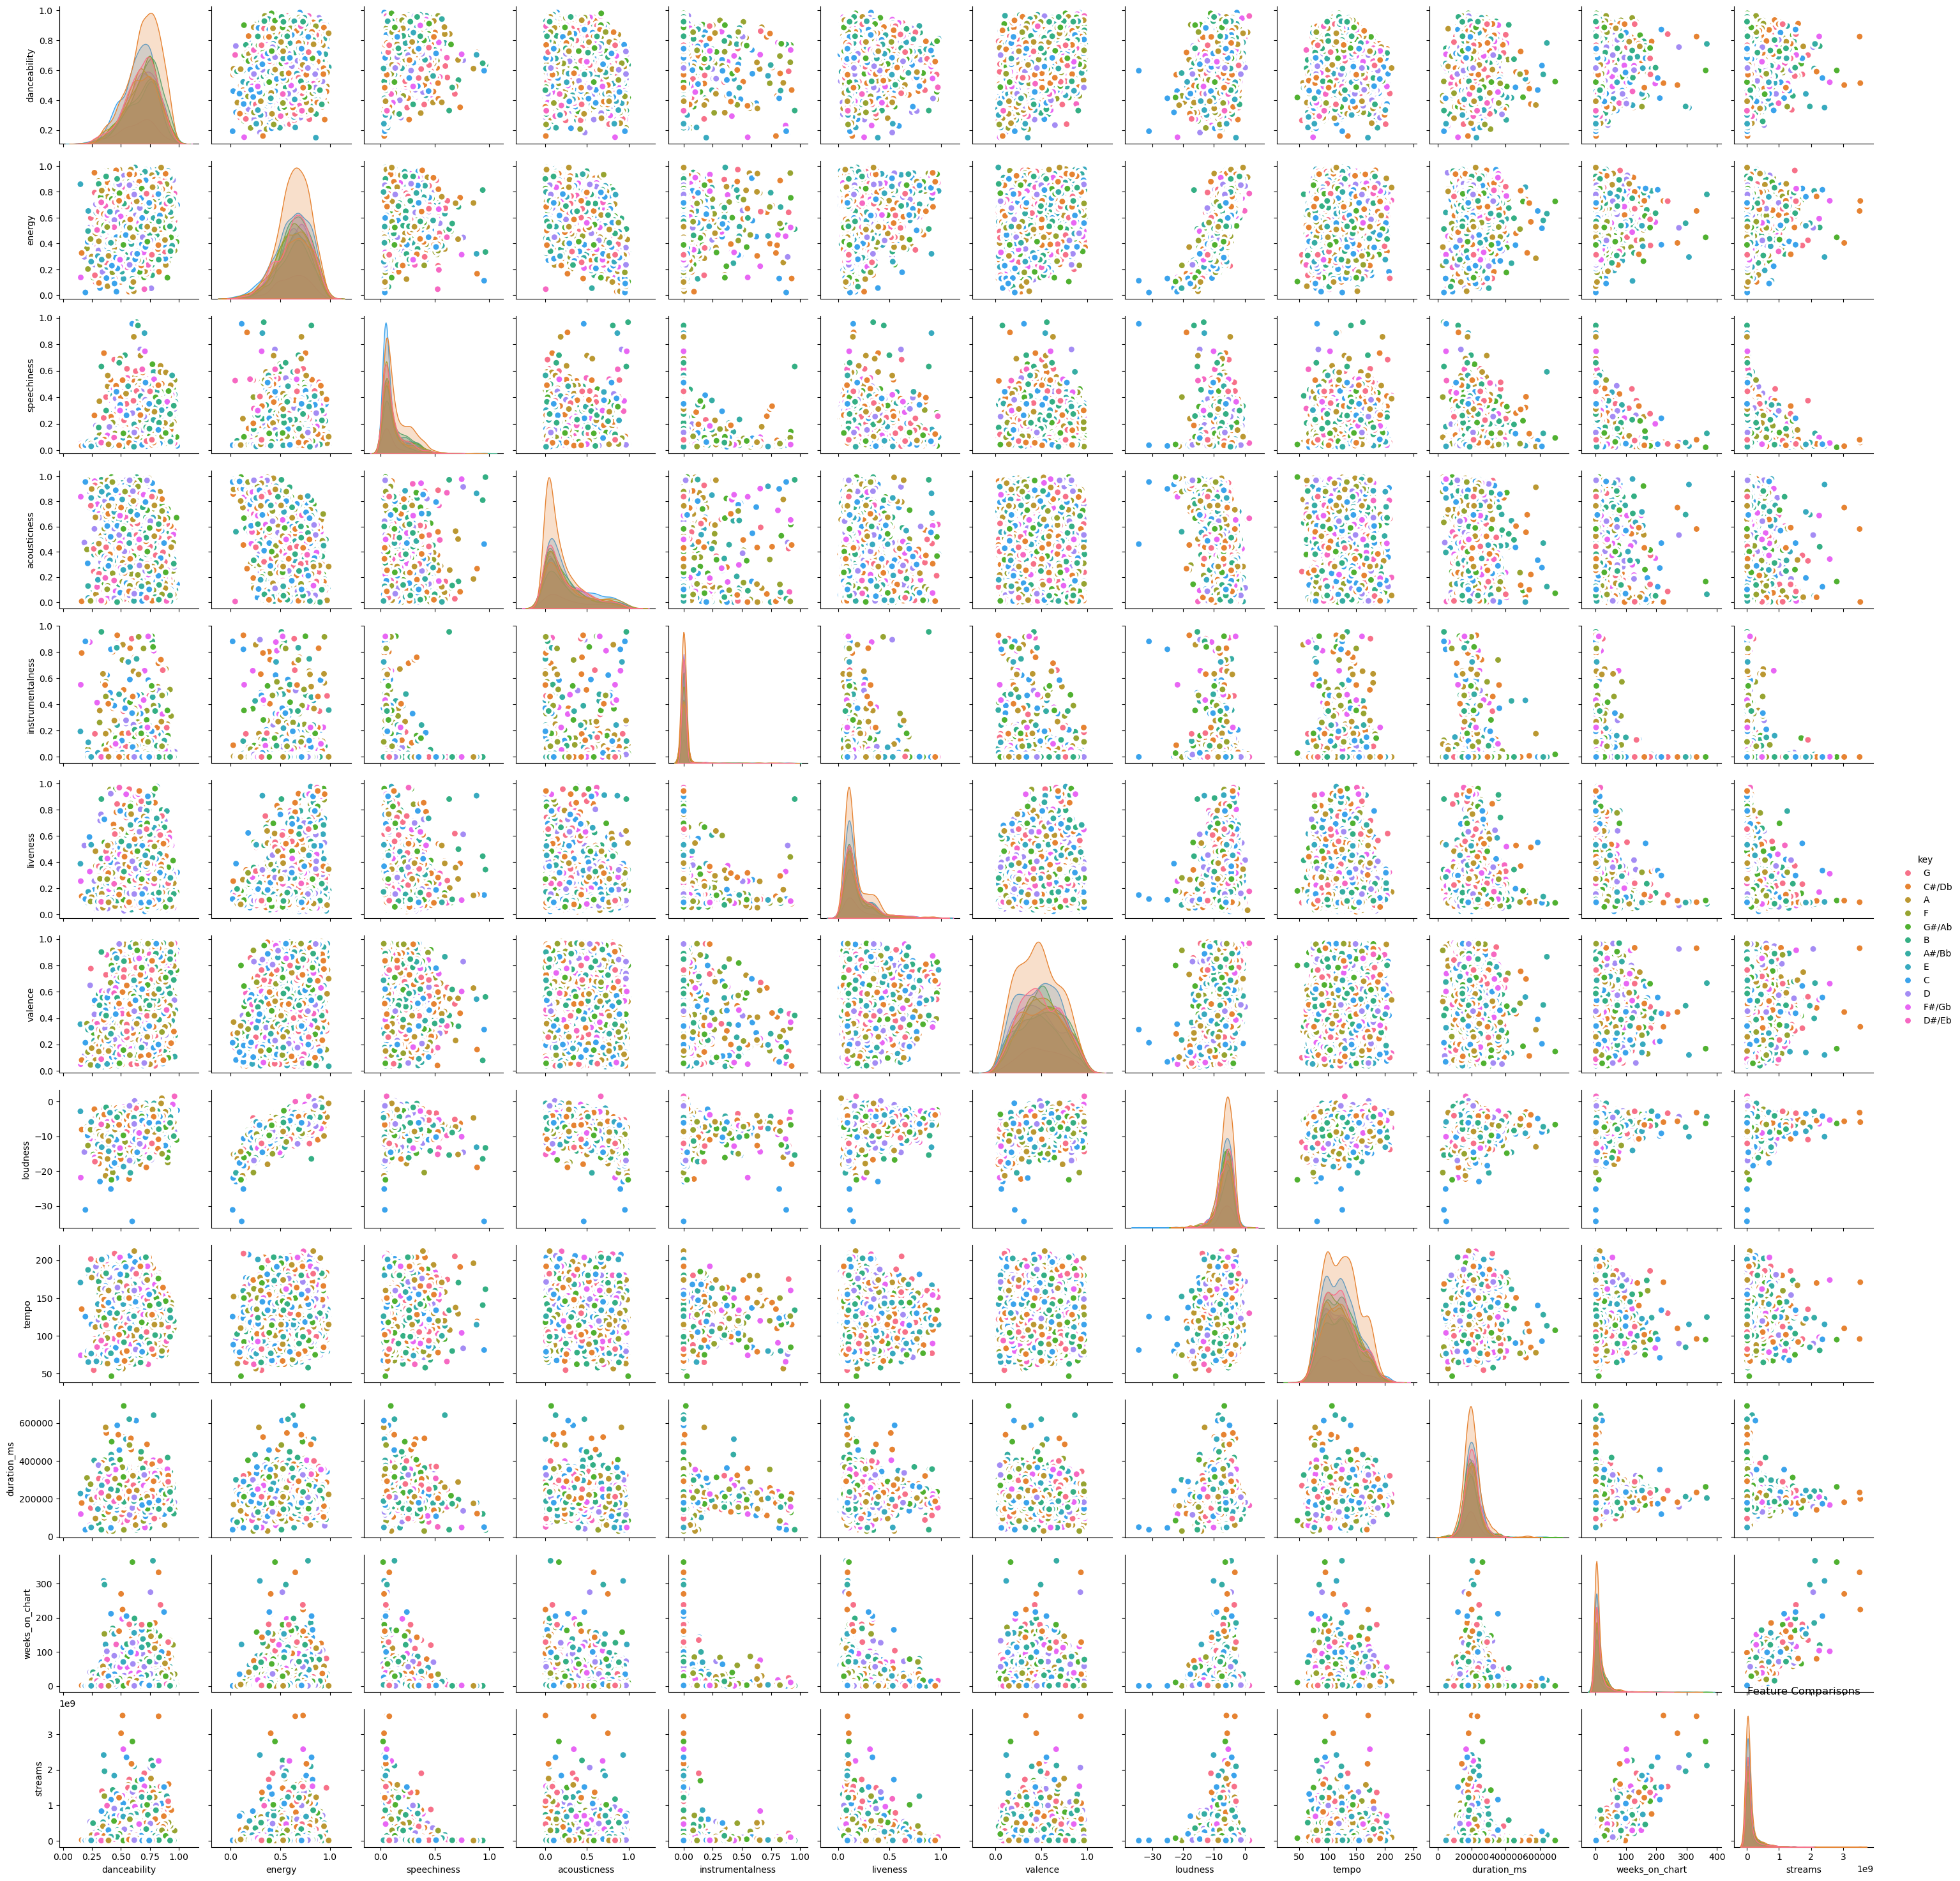

In [11]:
# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="scatter", hue="key", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.title('Feature Comparisons')
plt.show()

In many cases, we want to remove features that are linearly correlated with each other as they don't provide significantly unique information. However, sometimes linearly correlated variables can be helpful and choosing to keep or remove these features are up to the discretion of the person developing the machine learning model. 

## Why Care About Features?
Choosing features is vital for machine learning, choosing the wrong features can lead a model to predict incorrect classifications or values. In addition, providing vague information can lead to some misleading results. For example, if I were to describe something that had fur, ears, a tail, and two eyes, many would probably assume that I am describing either a cat or dog but it's difficult to tell what it actually is without more information. That is what features help provide, the information that helps narrow down the ambiguous information into something specific.

This ambiguity goes the same for machine learning in acoustics, using basic information such as amplitude in a particular frequency may help in solving problems that are only focused in that frequency or situtation. An example of this is trying to identify if there is a beep at a particular frequency, in the situation it is fine because you are only looking at that frequency and what sound is being made but in other situations as the case if you are trying to identify a dolphin click or a car horn that have the same frequency, it may not be as helpful. Please note there are many features and feature extraction techinques used but below we highlight a few feature extraction approaches for brevity.

# Examples of Feature Extraction
Using the sample sound wave below, we will demonstrate different feature extraction techniques. These approaches range from simple 1D acoustic wave extractions to 2D representations. Choosing what feature extraction technique to use is difficult and requires a little trial and error.

In [2]:
# Example Sound
filename = librosa.ex('trumpet')
y, sr = librosa.load(filename)

# Play audio file
ipd.Audio(data=y,rate = sr)

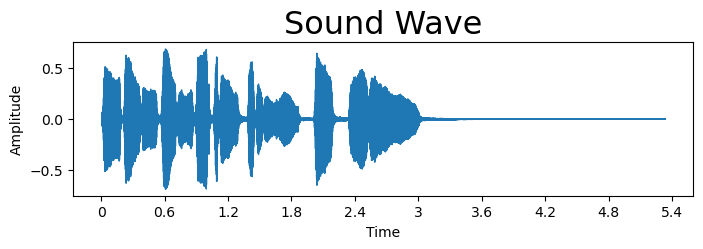

In [3]:
plt.figure(figsize = (8, 2))
librosa.display.waveshow(y = y, sr = sr);
plt.title("Sound Wave", fontsize = 23);
plt.ylabel('Amplitude')
plt.show()

## 1D Features
one-dimensional (1D) feature extraction can include numerical, categorical, time-series, etc. values that can be extracted from a your time-series or signal. For the sound above, We will demonstrate how to extract information by splitting the data into different segments. Specifically in windows of 2048 samples. One can easily do these approaches for the entire sound file, half, or in sections. 

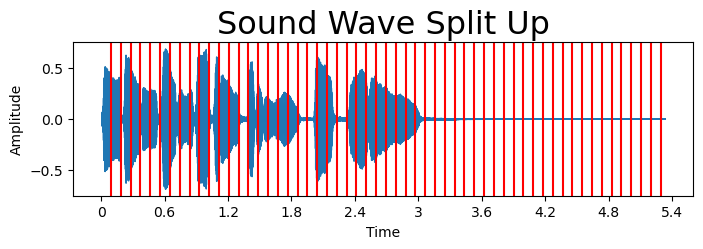

In [4]:
plt.figure(figsize = (8, 2))
librosa.display.waveshow(y = y, sr = sr);
for i in range(2048,len(y),2048):
    plt.axvline(x=i/sr,color='r')
plt.title("Sound Wave Split Up", fontsize = 23);
plt.ylabel('Amplitude')
plt.show()

Splitting the data into segments we can calculate a statistical metric, pull out information with a 1D convolutional neural network, or apply a dimension reducing/expanding transformation.

## Statistical Feature
A statistical feature can include anything from calculating a mean, variance, root mean square, energy, etc. from the data. These calculations can be a useful first approach toward feature extraction because (in many cases) machine learning models look for some mathematical rule for determining the probability of an output given an input. Below we will go over a few different features that can be extracted.

### Basic Statistics
Suppose we have a signal $x$ of length $n$ (number of samples) and we want to pull out a feature $A$. One approache we can take is calculating the average of the signal using:
$$
    A{\mu} = \frac{\sum_{i=1}^n(x_i)}{n}.
$$
The average of a signal can help pull out the underlying trend and remove some random noise from the signal which can be meaningful for a model. In some cases, the mean may be too harsh of a measure and is greatly impacted by outliers in the data. A different approach may be to take the median of the signal as:
$$
    A_{median}= 
\begin{cases}
    \frac{x[\frac{n+1}{2}]}{x},& \text{if n is odd} \\
    \frac{x[\frac{n}{2}]+x[\frac{n}{2}+1]}{2}, & \text{if n is odd}
\end{cases}
$$
The median can be a little less impacted by outlier data but may not be as useful for prediction. To look at the variability of a signal, we can extract the standard deviation as:
$$
    A{\sigma} = \sqrt{\frac{\sum_{i=1}^n(x_i-\mu)^2}{n}},
$$
where $\mu$ is the mean of the signal $x$. The standard deviation can help understand the variability of the signal. Another approach for feature extraction is taking the maximum or minium value of a signal as:
$$
    A_{max} = \max{x} : x = 1,...,n, 
$$
$$
    A_{min} = \min{x} : x = 1,...,n. 
$$
The maximum or minimum may be useful in identifying a sound for amplitude based approaches (i.e. trying to determine if a sound is over a threshold). For the next two features, we need to describe a moment of a given signal. A moment is defined as a quantitative characteristic of a distribution. This is calculated as:
$$
    m_r = \frac{1}{n}\sum^n_{i=1}(x_i - \mu)^r,
$$
where $r$ is the moment that is being calculated [9]. If the data tends to have some skewness around a mean (e.g. if you are trying to classify a quiet sound vs a loud one), another approach you can try is calculating the skewness of a signal using:
$$
    A_{skewness}=\frac{m_3}{m_2^{3/2}}
$$
We can think of skewness as the third standarized moment of a signal [9]. Skewness can be complemented with Kurtosis which measures the peakness of the distribution of a signal as:
$$
    A_{kurt} = \frac{m_4}{m_2^2}
$$
The kurtosis measures the fourth central moment of the data distribution [9].

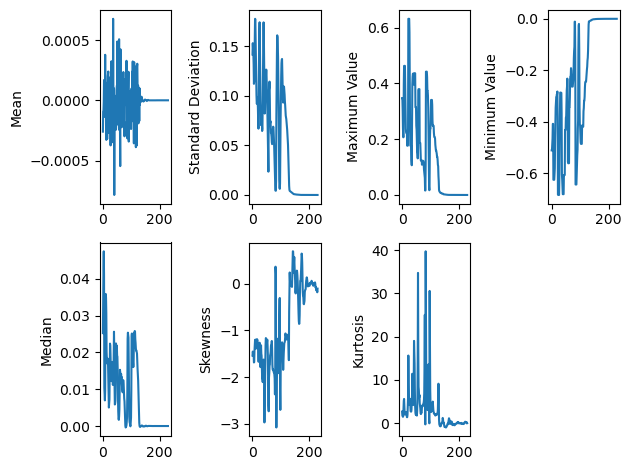

In [31]:
meanfeatures = []
stdfeatures = []
maxv = []
minv = []
median = []
skew = []
kurt = []
framelength = 2048
step = 512
for i in range(0,len(y),step):
    meanfeatures.append(np.mean(y[i:i+framelength]))
    stdfeatures.append(np.std(y[i:i+framelength]))
    maxv.append(np.max(y[i:i+framelength]))
    minv.append(np.min(y[i:i+framelength]))
    median.append(np.median(y[i:i+framelength]))
    skew.append(stats.skew(y[i:i+framelength]))
    kurt.append(stats.kurtosis(y[i:i+framelength]))

plt.subplot(2,4,1)
plt.plot(meanfeatures)
plt.ylabel('Mean')

plt.subplot(2,4,2)
plt.plot(stdfeatures)
plt.ylabel('Standard Deviation')

plt.subplot(2,4,3)
plt.plot(maxv)
plt.ylabel('Maximum Value')

plt.subplot(2,4,4)
plt.plot(minv)
plt.ylabel('Minimum Value')

plt.subplot(2,4,5)
plt.plot(median)
plt.ylabel('Median')

plt.subplot(2,4,6)
plt.plot(skew)
plt.ylabel('Skewness')

plt.subplot(2,4,7)
plt.plot(kurt)
plt.ylabel('Kurtosis')

plt.tight_layout()

### Root Mean Square 
The root mean square (RMS) of the waveform, that corresponds to its loudness. A signal $x$ of length $n$ (number of samples) can be calculated as follows:

$$
    X_{rms} = \sqrt{\frac{x_1^2+x_2^2+...+x_n^2}{n}}.
$$
The RMS can provide infromation relative to the signals energy that fluctuates over time [10]. 

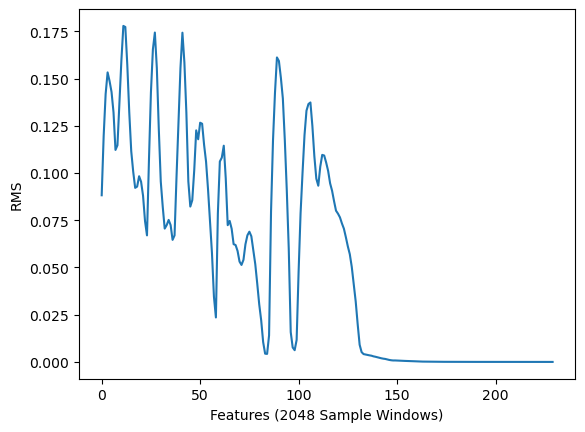

In [5]:
# Loudness
rmsfeat = librosa.feature.rms(y=y,frame_length=2048)
plt.plot(rmsfeat[0])
plt.ylabel('RMS')
plt.xlabel('Features (2048 Sample Windows)')
plt.show()

### Zero Crossing Rate
The zero crossing rate (ZCR) defines the number of times a signal crosses the zeros value [11]. This is calculated as:

$$
    zcr(A) = \frac{1}{2}\sum^{n}_{i=2}|sgn(x(i))-sgn(x(i))|,
$$
where $sgn$ indicates the sign of a number. A number that is negative returns a $-1$, a number that is zero returns $0$, and a number that returns a positive is $1$.

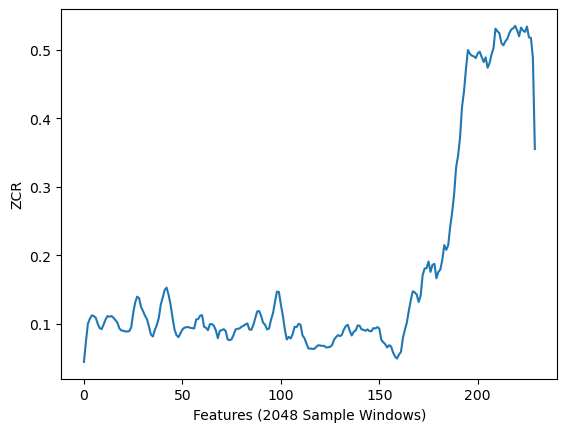

In [6]:
# Zeros Crossing Rate
zcrfeat = librosa.feature.zero_crossing_rate(y=y,frame_length=2048)
plt.plot(zcrfeat[0])
plt.ylabel('ZCR')
plt.xlabel('Features (2048 Sample Windows)')
plt.show()

### Energy
Energy of a signal is the total magnitude of a signal. This is related to how loud a signal is and is defined as:
$$
    E = \sum^n_{i=1}|x(i)|^2.
$$


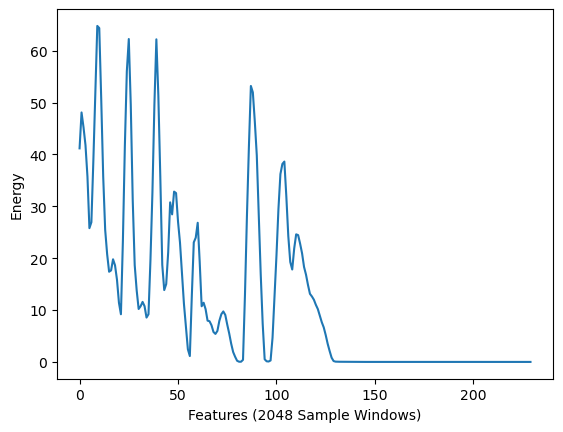

In [5]:
# Energy of a signal
energy = []
framelength = 2048
step = 512
for i in range(0,len(y),step):
    energy.append(np.sum(y[i:i+framelength]**2))
plt.plot(energy)
plt.ylabel('Energy')
plt.xlabel('Features (2048 Sample Windows)')
plt.show()

## Transformations
Transformations is an approach that can either reduce or expand a signal modifying it to be better suited to use for analysis and model training. Statistically, transformations can be thought of as log, square, eponential, etc. which will alter the signal. Another approach toward transformations is through convolutions which can extract key features which can be used to train a model. Below we will define a few transformations that can expand or reduce a signal to make it easier to learn for a model. Although we don't demonstrate data log or square transformations, we invite the reader to look at [11].

### Wavelets
Wavelets are short duration mathematical functions that are irregular and asymmetric that cut up data into different frequencies and scale componenets [12]. While we don't describe wavelets entirely, we invite the readers to look at [12,13,14] These are typically short discrete wavelet transforms (DWT) that pass the signal through a series of filters 
(i.e. high and low pass filters).  


can be written as: 

$$
    T_{m,n} = a_0^{-m/2} \int x[t]\psi (a_0^{-m}[t]-nb_0) dt,
$$
where $\psi$ is the wavelet function, $a$ is the dilation parameter, $b$ is the translation parameter, and $m$ dictates the width of the wavelet (i.e. high frequencies or low frequencies). For further description of DWT, take a read through [15]. Wavelets can be used in a number of different ways from data compression to feature extraction. A wavelet has a family which is a set of orthogonal functions to decompose nonperiodic continuous functions. We will demonstrate wavelets and different families below using the PyWavelets package [6].

In [1]:
from scipy import signal
import pywt

In [5]:
pywt.families()

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

#### Haar Wavelet
Haar wavelets (named after Alfréd Haar) can be defined as:
$$
    \psi_{haar}(t)= 
\begin{cases}
    1,& 0<t<\frac{1}{2} \\
    -1, & \frac{1}{2}<t<1\\
    0, & \text{otherwise}
\end{cases}
$$
This is a piecewise constant function with a zero average over it's support. The dilations and translations of the above to create an orthonormal basis are defined by:
$$
    \psi_{j,n}(t) = \frac{1}{\sqrt{2^j}}\psi(\frac{t-2^jn}{2 j})
$$
where $(j,n)\in \mathbb{Z}^2$ [14]. This can be visualized below by changing the level of which we are calculating the decomposition for a Haar wavelet.

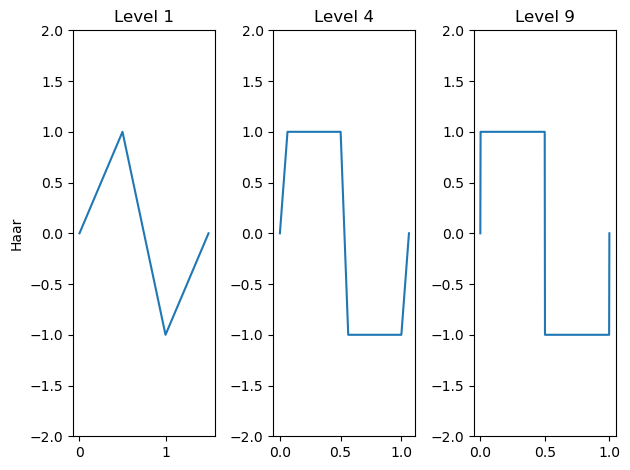

In [42]:
for n in range(1,4):
    plt.subplot(1,3,n)
    [phi, psi, x] = pywt.Wavelet('haar').wavefun(level=n**2)
    plt.plot(x,psi)
    plt.title(f'Level {n**2}')
    plt.ylim(-2,2)
    if n==1:
        plt.ylabel('Haar')
plt.tight_layout()
plt.show()

In the example above, we can see that the higher the level of Haar wavelet we use, the more the wavelet turns into a boxcar-like shape. 

#### Daubechies
The Daubechies wavelets (named after Ingrid Daubechies) are known to have the highest number of vanishing moments. These wavelets are orthogonal or biorthogonal and not symmetrical. This is usally expressed through a scaling function defined as:
$$
    \psi(t) = \sqrt{2}\sum_{k=0}^{N-1} c_k \phi(2t - k),
$$
where $\phi$ is the scaling function and N is the order [15]. Below we show a few examples of the order and level of the Daubechies wavelet.

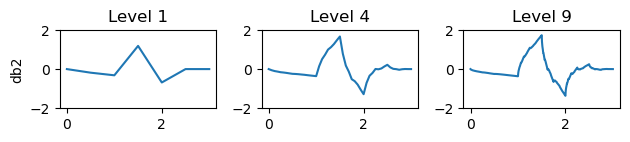

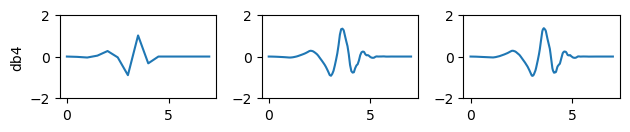

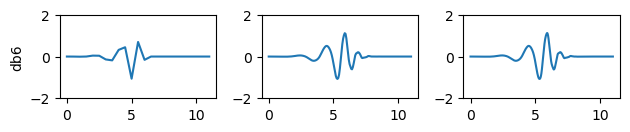

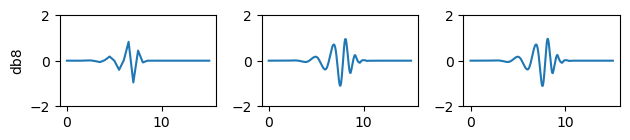

In [38]:
for n in range(1,4):
    plt.subplot(4,3,n)
    [phi, psi, x] = pywt.Wavelet('db2').wavefun(level=n**2)
    plt.plot(x,psi)
    plt.title(f'Level {n**2}')
    plt.ylim(-2,2)
    if n==1:
        plt.ylabel('db2')
plt.tight_layout()
plt.show()

for n in range(1,4):
    plt.subplot(4,3,n+3)
    [phi, psi, x] = pywt.Wavelet('db4').wavefun(level=n**2)
    plt.plot(x,psi)
    plt.ylim(-2,2)
    if n==1:
        plt.ylabel('db4')
plt.tight_layout()
plt.show()

for n in range(1,4):
    plt.subplot(4,3,n+6)
    [phi, psi, x] = pywt.Wavelet('db6').wavefun(level=n**2)
    plt.plot(x,psi)
    plt.ylim(-2,2)
    if n==1:
        plt.ylabel('db6')
plt.tight_layout()
plt.show()

for n in range(1,4):
    plt.subplot(4,3,n+9)
    [phi, psi, x] = pywt.Wavelet('db8').wavefun(level=n**2)
    plt.plot(x,psi)
    plt.ylim(-2,2)
    if n==1:
        plt.ylabel('db8')
plt.tight_layout()
plt.show()

#### Meyer Wavelet
The Meyer wavelet (named after Yves Meyer) is a orthogononal wavelet basis that is continuously differentiable but don't have compact support [16]. These wavelets are defined in the frequency domain as:
$$
    \psi_{Meyer}(w)= 
\begin{cases}
    \frac{1}{\sqrt{2\pi}}\cos{(\frac{\pi}{2}V(\frac{3w}{2\pi}-1))}e^{j\omega/2},& \text{if }\frac{2\pi}{3}\leq w\leq\frac{2\pi}{3} \\
    \frac{1}{\sqrt{2\pi}}\cos{(\frac{\pi}{2}V(\frac{3w}{4\pi}-1))}e^{j\omega/2}, & \text{if }\frac{4\pi}{3}\leq w\leq \frac{8\pi}{3}\\
    0, & \text{otherwise}
\end{cases}
$$
where V is a function defined as:
$$
    V(x)= 
\begin{cases}
    0,& \text{if }x<0 \\
    x, & \text{if }0<x<1\\
    1, & \text{if }x>1
\end{cases}
$$
The Meyer wavelet has the shape shown below.

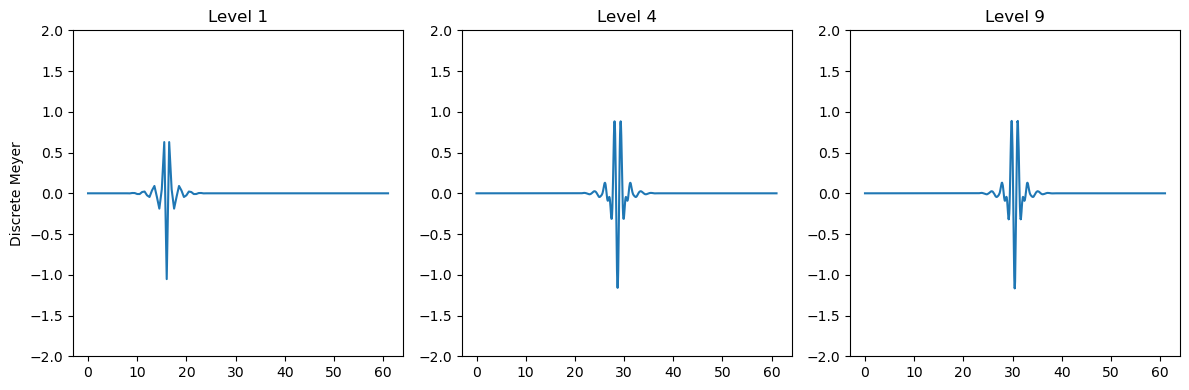

In [46]:
plt.figure(figsize=(12, 4))
for n in range(1,4):
    plt.subplot(1,3,n)
    [phi, psi, x] = pywt.Wavelet('dmey').wavefun(level=n**2)
    plt.plot(x,psi)
    plt.title(f'Level {n**2}')
    plt.ylim(-2,2)
    if n==1:
        plt.ylabel('Discrete Meyer')
plt.tight_layout()
plt.show()

#### Example Using Wavelets with time series
Now that we have gone over some families above we will discuss what information these wavelets pull out. In particular there is the approximation and detail coefficients. Approximation coefficients are the low-frequency components of a signal, similar to the low frequencies of sound. Conversely, detail coefficients are the high-frequency components of a signal. These coefficients (along with the mother wavelets) help define the signal that is being decomposed. Below we will demonstrate wavelet decomposition and the approximation and coefficient values that are pulled out.

In [50]:
# Robin bird example
filename = librosa.ex('robin')
y, sr = librosa.load(filename)

# Apply DWT
coeffs = pywt.dwt(y, 'db1')
cA, cD = coeffs

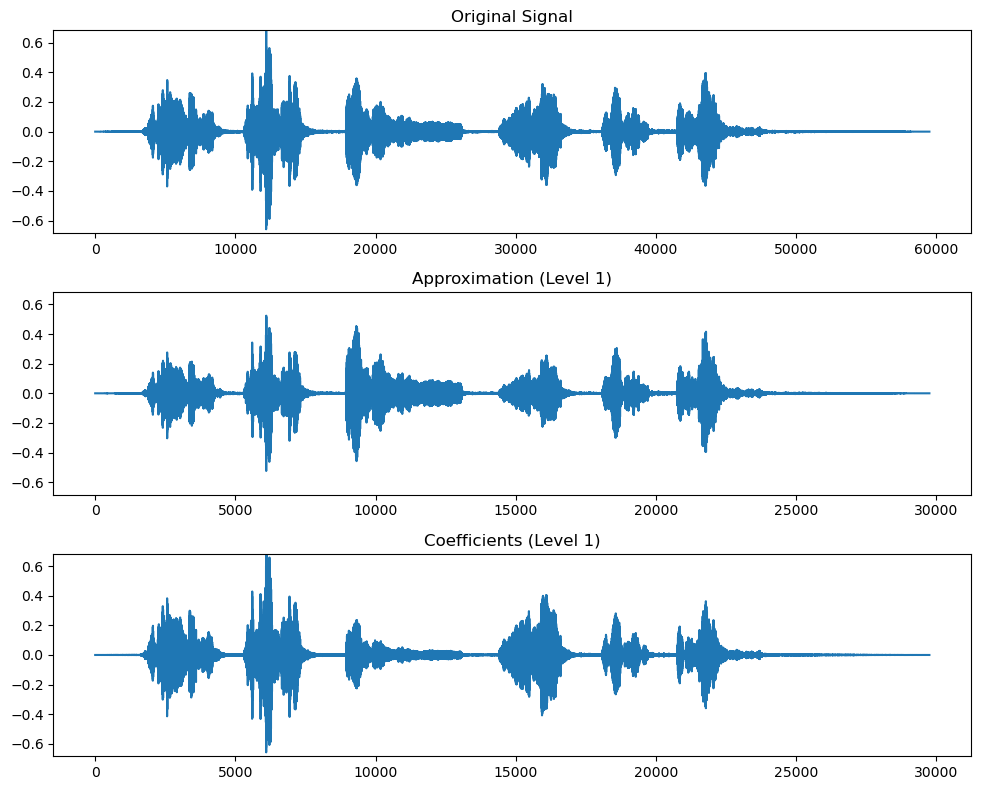

In [51]:
# Plot the original signal and the approximation and detail coefficients
fig, axs = plt.subplots(len(coeffs) + 1, 1, figsize=(10, 8))
lim = np.max(abs(y))
axs[0].plot(y)
axs[0].set_title('Original Signal')
axs[0].set_ylim(-lim,lim)

axs[1].plot(cA)
axs[1].set_title('Approximation (Level 1)')
axs[1].set_ylim(-lim,lim)

axs[2].plot(cD)
axs[2].set_title('Coefficients (Level 1)')
axs[2].set_ylim(-lim,lim)

plt.tight_layout()
plt.show()

The above example shows the results of using wavelets and the corresponding approximation and coefficient values. These outputted values can either be used as feature inputs or can be used to extract further features. Something to note about the above is the length of the resulting approximation and coefficient values. They are about half the length of the original signal, this has to do with the filtering process that is being implemented which downsamples the signal. These values can be decomposed further following the plot seen below. Decomposing the signal this way controls the noise and signal frequency at each level allowing you to work with the signal at different levels.  

In [56]:
from IPython.display import Image 
Image(url="Wavelet_decomp.jpeg", width=1500, height=1500) 

### Shapelets
Shapelet Transform algorithm extracts shapelets from a data set of time series and returns the distances between the shapelets and the time series. Shapelets are subsets of a time series in consecutive time. To improve classification using shapelets, the most discriminative shapelets are selected. Details of the shapelet transform and it's implementation can be found at [2].The below example is from https://pyts.readthedocs.io/en/stable/auto_examples/transformation/plot_shapelet_transform.html but we also include our own example from splitting up two acoustic sounds to demonstrate how this works.

In [3]:
from pyts.datasets import load_gunpoint
from pyts.transformation import ShapeletTransform

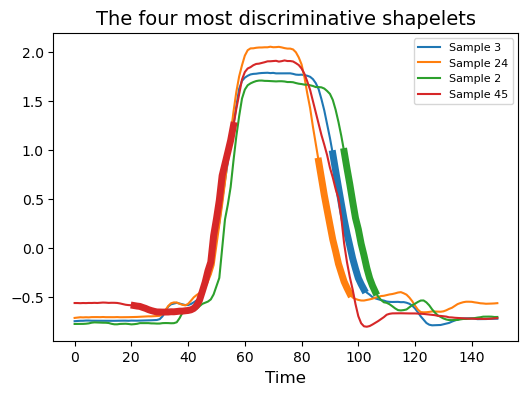

In [4]:
# Toy dataset
X_train, _, y_train, _ = load_gunpoint(return_X_y=True)

# Shapelet transformation
st = ShapeletTransform(window_sizes=[12, 24, 36, 48],
                       random_state=42, sort=True)
X_new = st.fit_transform(X_train, y_train)

# Visualize the four most discriminative shapelets
plt.figure(figsize=(6, 4))
for i, index in enumerate(st.indices_[:4]):
    idx, start, end = index
    plt.plot(X_train[idx], color='C{}'.format(i),
             label='Sample {}'.format(idx))
    plt.plot(np.arange(start, end), X_train[idx, start:end],
             lw=5, color='C{}'.format(i))

plt.xlabel('Time', fontsize=12)
plt.title('The four most discriminative shapelets', fontsize=14)
plt.legend(loc='best', fontsize=8)
plt.show()

In the plot above, we are visualizing the four most distinct shapelets that can discriminate the data. Using these shapelets, we can transform our data by calculating the distances from a series to each shapelet ultimately improving classification accuracy.

#### Example using two sounds
Let's now suppose we have two sounds and we want to find distinguishing characteristics of two acoustic sounds, namely a trumpet and a robin. We can use shapelets to identify key segments in their time-series to classify and distinguish between the two. 

In [5]:
def split_array_equally(arr, n):
    """Splits an array into equal parts and removes any unequal part."""

    size = len(arr) // n
    return [arr[i:i + size] for i in range(0, size * n, size)]

In [6]:
# generate a dataset for classifciation based on examples
# trumpet example
filename = librosa.ex('trumpet')
y, sr = librosa.load(filename)

data1 = np.vstack(split_array_equally(y,200)).T

# Robin bird example
filename = librosa.ex('robin')
y, sr = librosa.load(filename)

data2 = np.vstack(split_array_equally(y,200)).T

inputs = np.vstack([data1,data2])
outputs = np.vstack([np.ones((data1.shape[0],1)),2*np.ones((data2.shape[0],1))]).ravel()

In [7]:
# Shapelet transformation
# transform the data using shapelets to 
st = ShapeletTransform(window_sizes=[12, 24, 36, 48],random_state=42, sort=True)
X_new = st.fit_transform(inputs,outputs)

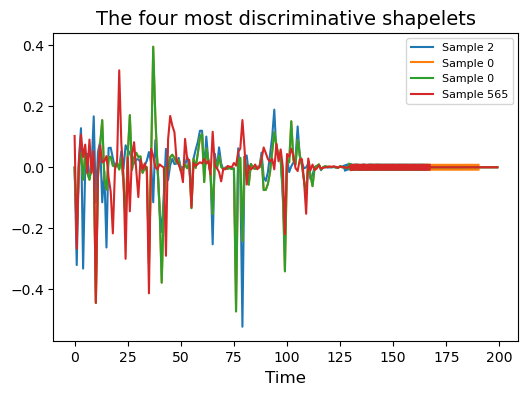

In [8]:
# Visualize the four most discriminative shapelets
plt.figure(figsize=(6, 4))
for i, index in enumerate(st.indices_[:4]):
    idx, start, end = index
    plt.plot(inputs[idx], color='C{}'.format(i),
             label='Sample {}'.format(idx))
    plt.plot(np.arange(start, end), inputs[idx, start:end],
             lw=5, color='C{}'.format(i))

plt.xlabel('Time', fontsize=12)
plt.title('The four most discriminative shapelets', fontsize=14)
plt.legend(loc='best', fontsize=8)
plt.show()

### Kernel
RandOm Convolutional KErnel Transformation (ROCKET) uses randomly generated convolutional kernels and extracts two features for each convolution: the maximum and the proportion of positive values [1]. You can run ROCKET in a few ways. One way is through an unsupervised technique that pulls out information without knowledge of the output and you can run it with a supervised approach that can identify kernels that create a seperation in the data. Below we use two sounds of a trumpet and robin that are split up in time and show how rocket seperates the two sound segments.

In [9]:
from pyts.transformation import ROCKET

In [10]:
def split_array_equally(arr, n):
    """Splits an array into equal parts and removes any unequal part."""

    size = len(arr) // n
    return [arr[i:i + size] for i in range(0, size * n, size)]

In [12]:
# generate a dataset for classifciation based on examples
# trumpet example
filename = librosa.ex('trumpet')
y, sr = librosa.load(filename)

data1 = np.vstack(split_array_equally(y,200)).T

# Robin bird example
filename = librosa.ex('robin')
y, sr = librosa.load(filename)

data2 = np.vstack(split_array_equally(y,200)).T

inputs = np.vstack([data1,data2])
outputs = np.vstack([np.ones((data1.shape[0],1)),2*np.ones((data2.shape[0],1))]).ravel()

In [14]:
rocket = ROCKET(n_kernels=200, random_state=42)
x_rocket = rocket.fit_transform(X = inputs,y = outputs)

In [15]:
# import PCA to decompose the data to plot
from sklearn.decomposition import PCA

explained variance ratio (first two components): [0.47669193 0.05835271]


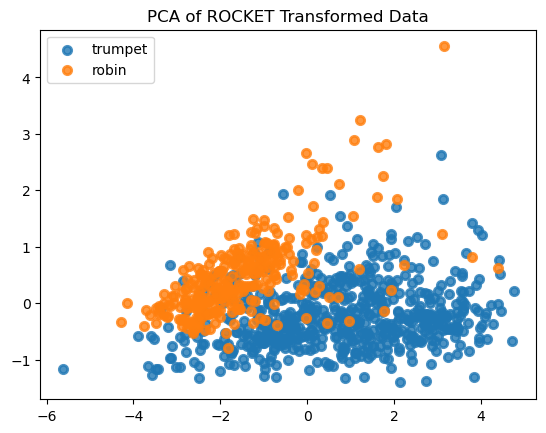

In [20]:
pca = PCA(n_components=2)
X_r = pca.fit_transform(x_rocket)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
target_name = ["trumpet","robin"]

for i, target_name in zip([1, 2], target_names):
    plt.scatter(
        X_r[outputs == i, 0], X_r[outputs== i, 1], alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of ROCKET Transformed Data")

plt.show()

From the resulting PCA we can see that there is some seperation between the two types of sounds using the ROCKET transform which can be used to train a model for prediction. This approach offers relatively fast results but is hard to interpret the features that are being extracted from the signals. 

## 2D Features

### Spectral Features
Let's start with something simple, we will look at a synthetic signal:

$$
    Y(t) = 2\cos(f_0t) + 4\sin(f_1t) + \cos(f_2t) + 2\sin(f_3t) 
$$
where $f_N$ is a particular frequency 

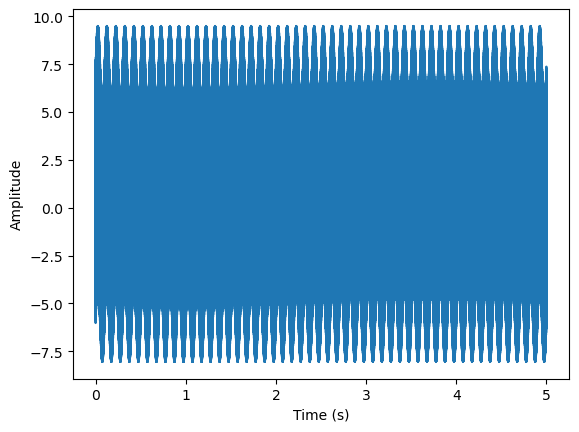

In [6]:
# generate signal
sr = 25000

x = np.arange(0,5,1/sr)

f0 = 10
f1 = 10000
f2 = 5000
f3 = 2000
y = 2*np.sin(f0* 2*np.pi*x)+4*np.cos(f1* 2*np.pi*x)+.5*np.cos(f2* 2*np.pi*x)+3*np.cos(f3* 2*np.pi*x)

plt.plot(x,y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

Using the generated signal, we will calculate the one sided fast fourier transform (FFT).

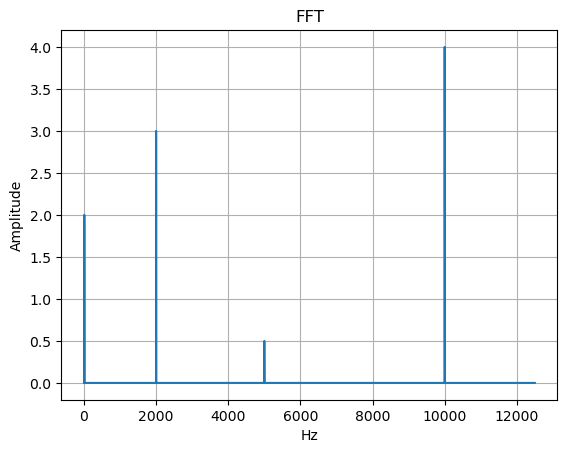

In [56]:
from scipy.fft import fft, fftfreq
N = len(x)
yf = fft(y)
xf = fftfreq(N, 1/sr)[:N//2]

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.title('FFT')
plt.ylabel('Amplitude')
plt.xlabel('Hz')
plt.show()

We can see that the signal is broken into it's frequency components that were defined previously. The problem with the FFT is when there are transient sounds present in a signal. The FFT is not able to capture the local transient sound and does not have any temporal component. To alleviate this, we can take windows of the signal and apply the FFT to capture the transient sound. This is refered to as short-time Fourier transform (STFT). This is shown below for the generated sound.

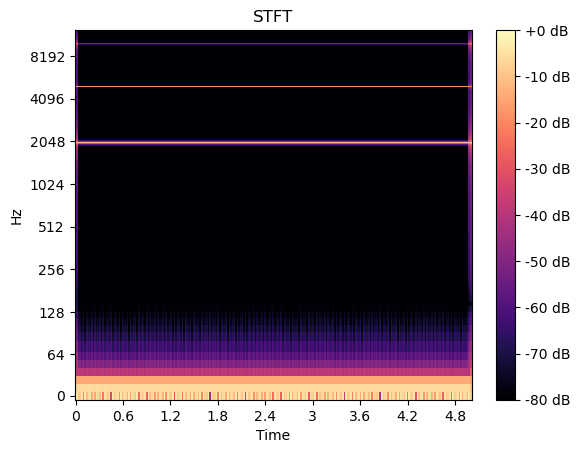

In [7]:
# Pre-compute a global reference power from the input spectrum
D = librosa.stft(y)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, sr = sr,x_axis='time', y_axis='log', ax=ax)
ax.set(title='STFT')
fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.show()

Above you can see the frequencies that are included in the signal $y$ and the resulting STFT. These kinds of images can be decomposed by frequency/time or put into a large convolutional neural network (CNN) to classify the sounds seen in the STFT. In addition to short time frequency transform, we can also use a few other transforms. One such example is using a Mel-frequency spectrogram. Details of the Mel-frequency spectrogram can be found in the Introduction to signal processing notebook.

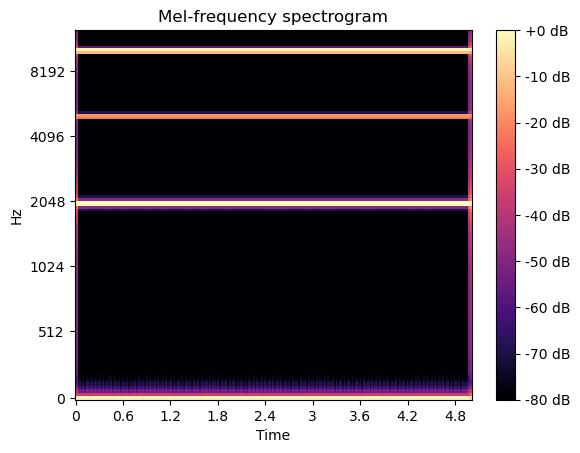

In [9]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sr, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
plt.show()

### Chromograms
Additionally, there are other representations that can be used such as chromagrams which maps the entire spectrum into pitch classes. Each octave is divided into bins, representing each semitone. These octaves are can be used to distinguish different pitchs in music.

The chromagram Short-time Fourier transform computes a waveform or power spectrogram. This implementation is derived from [7].

In [10]:
filename = librosa.ex('trumpet')
y, sr = librosa.load(filename)

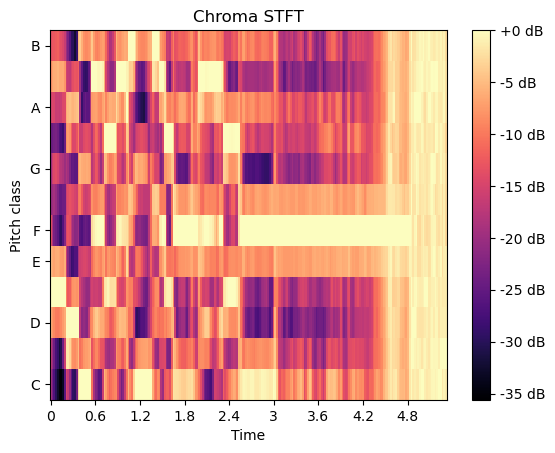

In [14]:
# Chroma stft
S = librosa.feature.chroma_stft(y=y, sr=sr)

fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, y_axis='chroma', x_axis='time', sr=sr, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Chroma STFT')
plt.show()

The constant-Q chromogram is related to the Fourier transform and the Morlet wavelet transform. It uses a series of filters logarithmically spaced in frequency.

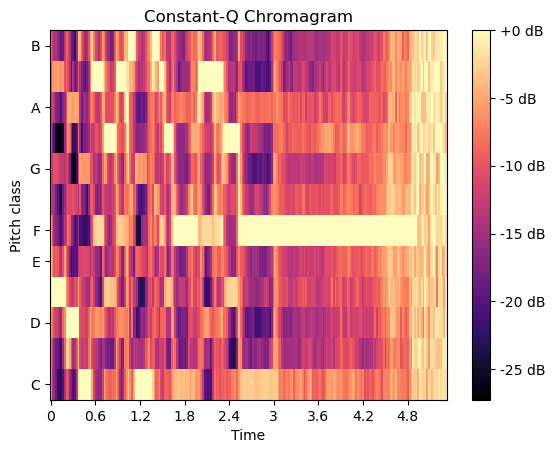

In [15]:
# Chroma CQT
S = librosa.feature.chroma_cqt(y=y, sr=sr)

fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, y_axis='chroma', x_axis='time', sr=sr, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Constant-Q Chromagram')
plt.show()

Compute the chroma variant “Chroma Energy Normalized” (CENS)

To compute CENS features, following steps are taken after obtaining chroma vectors using chroma_cqt:
1) L-1 normalization of each chroma vector
2) Quantization of amplitude based on “log-like” amplitude thresholds

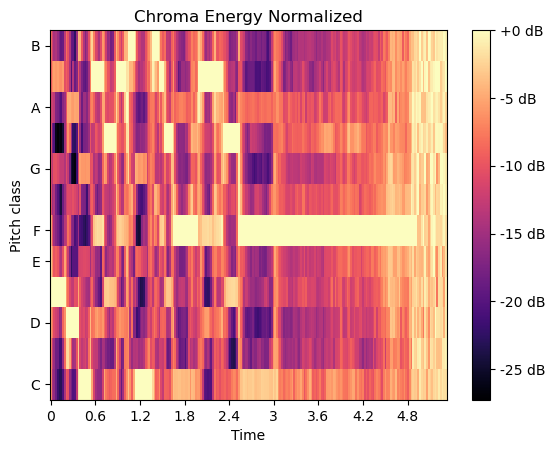

In [16]:
# Chorma CENS
chromagram = librosa.feature.chroma_cens(y=y, sr=sr)

fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, y_axis='chroma', x_axis='time', sr=sr, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Chroma Energy Normalized')
plt.show()

## References
1) A. Dempster, F. Petitjean and G. I. Webb, “ROCKET: Exceptionally fast and accurate time series classification using random convolutional kernels”. https://arxiv.org/abs/1910.13051.
2) J. Lines, L. M. Davis, J. Hills and A. Bagnall, “A Shapelet Transform for Time Series Classification”. Data Mining and Knowledge Discovery, 289-297 (2012).
3) Johann Faouzi and Hicham Janati. pyts: A python package for time series classification. Journal of Machine Learning Research, 21(46):1−6, 2020.
4) Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.
5) McFee, Brian, Colin Raffel, Dawen Liang, Daniel PW Ellis, Matt McVicar, Eric Battenberg, and Oriol Nieto. “librosa: Audio and music signal analysis in python.” In Proceedings of the 14th python in science conference, pp. 18-25. 2015.
6) Gregory R. Lee, Ralf Gommers, Filip Wasilewski, Kai Wohlfahrt, Aaron O’Leary (2019). PyWavelets: A Python package for wavelet analysis. Journal of Open Source Software, 4(36), 1237, https://doi.org/10.21105/joss.01237.
7) Ellis, Daniel P.W. “Chroma feature analysis and synthesis” 2007/04/21 https://www.ee.columbia.edu/~dpwe/resources/matlab/chroma-ansyn/
8) Meinard Müller and Sebastian Ewert “Chroma Toolbox: MATLAB implementations for extracting variants of chroma-based audio features” In Proceedings of the International Conference on Music Information Retrieval (ISMIR), 2011.
9) Zwillinger, D. and Kokoska, S. (2000). CRC Standard Probability and Statistics Tables and Formulae. Chapman & Hall: New York. 2000.
10) D.I. Crecraft, S. Gergely, in Analog Electronics: Circuits, Systems and Signal Processing, 2002
11) Goswami, T., & Sinha, G. R. (Eds.). (2022). Statistical modeling in machine learning. San Diego, CA: Academic Press.
12) A. Graps, "An introduction to wavelets," in IEEE Computational Science and Engineering, vol. 2, no. 2, pp. 50-61, Summer 1995, doi: 10.1109/99.388960.
13) T. Guo, T. Zhang, E. Lim, M. López-Benítez, F. Ma and L. Yu, "A Review of Wavelet Analysis and Its Applications: Challenges and Opportunities," in IEEE Access, vol. 10, pp. 58869-58903, 2022, doi: 10.1109/ACCESS.2022.3179517.
14) Mallat Stéphane, (2009). In A Wavelet Tour of Signal Processing (p. iv). doi:10.1016/b978-0-12-374370-1.00001-x
15) Daubechies, I. Ten Lectures on Wavelets. CBMS-NSF Regional Conference Series in Applied Mathematics. Philadelphia, PA: Society for Industrial and Applied Mathematics, 1992.
16) I. Meyer, Wavelets and operators. Vol.1. Cambridge University Press, 1995.